

---


# Ce notebook illustre les effets principaux de la numérisation du son.


---
Pour avancer d'étape en étape, il suffit de cliquer sur la petite flèche "play" pour lancer le tracé codé dans une case.

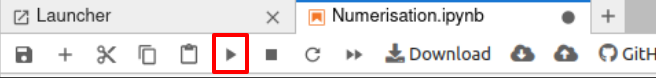


Pour pouvoir manipuler des sons avec python, il nous faut quelques "extensions", que l'on va installer en lançant les deux cases ci-dessous.
Il faut bien patienter ($\sim 20$ secondes) que l'exécution d'une case soit terminée avant de lancer la case suivante.

Le port d'écouteurs ou d'un casque est conseillé, sinon assurez-vous de ne pas perturber vos camarades avec les sons écoutés.

Pré-requis : signal analogique, signal numérique, notion de stockage binaire et de taille de fichier

In [ ]:
%pip install matplotlib
%pip install pydub
print("Installations terminées")

Installations terminées


In [ ]:
%matplotlib inline
from ipywidgets import interactive,interact
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import locale
from pydub import AudioSegment
import warnings
warnings.filterwarnings('ignore')
print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


***

Pour stocker un son, il faut enregistrer le signal de pression de l'air en fonction du temps. Bien sûr, nos dispositifs de stockage ont une taille limitée et donc on ne peut stocker qu'un nombre limité de valeurs (quelques dizaines de milliards de valeurs sur une clé USB classique).


On est donc obligés d'**échantillonner** le signal, en ne mémorisant la pression de l'air que de temps en temps. La fréquence à laquelle on mémorise un échantillon du signal est appelée la **fréquence d'échantillonnage**. Autrement dit, si la fréquence d'échantillonnage vaut 200 Hz, on mémorise 200 points du signal pour chaque seconde du signal.

Le bloc ci-dessous vous permet de faire varier la fréquence d'échantillonnage lors de la numérisation d'un son.
<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific
purpose that the other boxes can't cover. For example, if you have a lot
of related content to link to, maybe you decide to use green boxes for
related links from each section of a notebook.
</div>

***


In [ ]:
plt.rcParams.update({'font.size': 18})
#locale.setlocale(locale.LC_ALL, '')
#plt.rcParams['axes.formatter.use_locale'] = True


Tmin = 0
Tmax = 0.02
points = 1000
freq = 100


def sample2(signal,temps,f_ech,bit_qt):
  signal_max = np.max(signal)
  signal_min = np.min(signal)
  step = (signal_max-signal_min)/(2**bit_qt)

  numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_ech)
  avg = [signal[0]]
  signech = []
  lastavg = 0
  for index in range(1,len(signal)):
    avg.append(signal[index])
    if len(avg) < numb_avg_points :
      pass
    else :
      lastavg = avg[0]
      for i in range(len(avg)):
        signech.append(lastavg)
      avg = []

  lastavg = np.mean(avg)
  for i in range(len(avg)):
        signech.append(lastavg)

  #signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après pour pas les perdre
  signal_sample = signech
  return(signal_sample)


def f(f_echantillonnage):

    fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(18,8))
    bit_qt = 64

    x = np.linspace(Tmin, Tmax,points)
    signal = np.sin(2*np.pi*x*freq)

    axs[0].plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5,label = "signal initial")

    signalech = sample2(signal,x,f_echantillonnage,bit_qt)

    tech = np.linspace(Tmin,Tmax,int((Tmax-Tmin)*f_echantillonnage)+1) #pb avec le step ici -> asservi au fenêtrage temporel
    axs[0].scatter(tech*1000, np.sin(2*np.pi*tech*freq) ,color = 'red',linewidth = 2,label = "échantillonnage")

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    #ax.set_title("Enregistrement")
    """
    axs[0].grid(which='major', color='#DDDDDD', linewidth=2)
    axs[0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)
    axs[0].minorticks_on()"""
    axs[0].legend(loc="best")




    axs[1].plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5,label = "signal initial")


    axs[1].scatter(tech*1000, np.sin(2*np.pi*tech*freq) ,color = 'red',linewidth = 2)

    minloc,maxloc=(np.min(signal),np.max(signal))
    for line in range(len(tech)-1):
      axs[0].plot((tech[line]*1000,tech[line]*1000),(minloc,maxloc),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.5)

      if line ==0 :
        axs[1].plot((tech[line]*1000,tech[line]*1000+1000/f_echantillonnage),(np.sin(2*np.pi*tech[line]*freq),np.sin(2*np.pi*tech[line]*freq)),color = 'red',linewidth = 2,label="signal échantillonné")
      else :
        axs[1].plot((tech[line]*1000,tech[line]*1000+1000/f_echantillonnage),(np.sin(2*np.pi*tech[line]*freq),np.sin(2*np.pi*tech[line]*freq)),color = 'red',linewidth = 2)
    #signalech = sample2(signal,x,f_echantillonnage,bit_qt)
    #axs[1].plot(x*1000, signalech ,color = 'red',linewidth = 2,label = "signal échantillonné")

    axs[1].set_ylabel("Amplitude (V)")
    axs[1].set_xlabel("Temps (ms)")
    axs[0].set_title("Fréquence d'échantillonnage : {} Hz".format(f_echantillonnage))
    """
    axs[1].grid(which='major', color='#DDDDDD', linewidth=2)
    axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)
    axs[1].minorticks_on()"""
    axs[1].legend(loc="best")
    plt.show()


interactive_plot = interactive(f, f_echantillonnage=(100, 2000,100))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot



interactive(children=(IntSlider(value=1000, description='f_echantillonnage', max=2000, min=100, step=100), Out…

 L'échantillonnage est un compromis : on voit que l'allure du signal échantillonné diffère du signal initial entre deux échantillons successifs!

 Pour un son d'1 seconde, on pourrait enregistrer 1000 points (1 toutes les millisecondes), 1 million de points (1 toutes les microsecondes), 1 milliard de points (1 toutes les nanosecondes) etc..

 Plus on veut être précis en enregistrant un signal fidèle au signal analogique initial, plus le fichier sera lourd!

In [ ]:
Tmin = 0
Tmax = 0.02
points = 1000
freq = 100


def sample(signal,temps,f_ech,bit_qt):
  signal_max = np.max(signal)
  signal_min = np.min(signal)
  step = (signal_max-signal_min)/(2**bit_qt)
  #signal_sample = [((point-signal_min)//step)*step+signal_min for point in signal]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement

  numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_ech)
  avg = [signal[0]]
  signech = []
  lastavg = 0
  for index in range(1,len(signal)):
    avg.append(signal[index])
    if len(avg) < numb_avg_points :
      pass
    else :
      lastavg = np.mean(avg)
      for i in range(len(avg)):
        signech.append(lastavg)
      avg = []

  lastavg = np.mean(avg)
  for i in range(len(avg)):
        signech.append(lastavg)

  signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement
  #attention c'est une qtfication centrée

  return(signal_sample)


def f(freq_ech,bit_qt):


    fig,ax = plt.subplots(figsize=(13,5))



    x = np.linspace(Tmin, Tmax,points)
    signal = np.sin(2*np.pi*x*freq)

    ax.plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5)

    signalech = sample(signal,x,freq_ech,bit_qt)

    ax.plot(x*1000, signalech ,color = 'black',linewidth = 2)

    ax.set_ylabel("Amplitude (V)")
    ax.set_xlabel("Temps (ms)")

    ax.set_title("Quantification")

    """
    ax.grid(which='major', color='#DDDDDD', linewidth=2)

    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)

    ax.minorticks_on()"""

    minx,maxx = (np.min(x)*1000,np.max(x)*1000)
    (sign_min,sign_max) = (np.min(signal),np.max(signal))
    steploc = (sign_max-sign_min)/(2**bit_qt)
    ax.plot((minx,maxx),(sign_min+steploc/2,sign_min+steploc/2),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.05+np.max(((0.5-(2**bit_qt)/256),0)),label = "niveaux de quantification")
    for quantiline in range(1,2**bit_qt):
        ax.plot((minx,maxx),(sign_min+steploc*quantiline+steploc/2,sign_min+steploc*quantiline+steploc/2),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.05+np.max(((0.5-(2**bit_qt)/256),0)))

    ax.legend(loc = 'upper right')

    plt.show()


interactive_plot = interactive(f, freq_ech=(100, 10000,100),bit_qt=(2,8,1))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

#ajoouter la possibilité d'écouter, de jouer des morceaux pré-enregistrés, et d'écouter l'effet de la compression



interactive(children=(IntSlider(value=5000, description='freq_ech', max=10000, min=100, step=100), IntSlider(v…

In [109]:

#sound = []

sr = 22050 # sample rate encodage mp3

freq = 300
Tmin = 0
Tmax = 2/freq
points = int((Tmax-Tmin)*sr)

#freq_echan = 50000
#bit_qt = 32
x = np.linspace(Tmin, Tmax,points)

def sampleloc(signal,temps,f_echloc,bit_qtloc):
  signal_max = np.max(signal)
  signal_min = np.min(signal)
  step = (signal_max-signal_min)/(2**bit_qtloc)
  #signal_sample = [((point-signal_min)//step)*step+signal_min for point in signal]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement

  numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_echloc)
  avg = [signal[0]]
  signech = []
  lastavg = 0
  for index in range(1,len(signal)):
    avg.append(signal[index])
    if len(avg) < numb_avg_points :
      pass
    else :
      lastavg = np.mean(avg)
      for i in range(len(avg)):
        signech.append(lastavg)
      avg = []

  lastavg = np.mean(avg)
  for i in range(len(avg)):
        signech.append(lastavg)

  signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement
  #attention c'est une qtfication centrée

  return(signal_sample)


def Soundrand(son,freq_echan,bit_qty,signal_initial = False):
    #global sound

    if son == "son pur":
      signal = np.sin(2*np.pi*x*freq)


      if signal_initial :
        ysound = list(signal[1:])*500
        sound = ipd.Audio(ysound, rate=sr, autoplay=True)
      else :
        signalech = sampleloc(signal,x,freq_echan,bit_qty)
        ysound = list(signalech[1:])*500
        sound = ipd.Audio(ysound, rate=sr, autoplay=True)



    elif son == "mario":
      duree=13

      audio_file = AudioSegment.from_file("mario2.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::4])
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::4]
        signalech = sampleloc(signal,x,freq_echan,bit_qty)
        ysound = list(signalech)*1
        sr3 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr3, autoplay=True)

    else :
      duree=18

      audio_file = AudioSegment.from_file("doom.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::4])
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::4]
        signalech = sampleloc(signal,x,freq_echan,bit_qty)
        ysoundd = list(signalech)*1
        sr3 = len(ysoundd)/duree
        sound = ipd.Audio(ysoundd, rate=sr3, autoplay=True)


    if signal_initial == False :
        print("Fréquence d'échantillonnage : {} Hz et quantification sur {} bits".format(freq_echan,bit_qty))
    else :
        print("Fréquence d'échantillonnage : 44100 Hz et quantification sur 32 bits".format(freq_echan,bit_qty))
    return sound




interactive_plot = interact(Soundrand, son =["son pur","mario","doom"],freq_echan=(100, 20000,1000),bit_qty=(2,10,1),son_initial=False)



interactive_plot

#interactive_plot


interactive(children=(Dropdown(description='son', options=('son pur', 'mario', 'doom'), value='son pur'), IntS…

<function __main__.Soundrand(son, freq_echan, bit_qty, signal_initial=False)>

In [119]:
#debug
#sound = []
verbose = False
sr = 22050 # sample rate encodage mp3

freq = 300
Tmin = 0
Tmax = 2/freq
points = int((Tmax-Tmin)*sr)

#freq_echan = 50000
#bit_qt = 32

def sampleloc(signal,temps,f_echloc,bit_qtloc):
    signal_max = float(np.max(np.asarray(signal)))
    signal_min = float(np.min(np.asarray(signal)))
    if verbose :
      print(signal_max,signal_min,type(signal_max),signal_max-signal_min)
    step = (signal_max-signal_min)/(2**bit_qtloc)
    if verbose :
      print("bitqt_loc is {} and step is {}".format(bit_qtloc,step))
    #signal_sample = [((point-signal_min)//step)*step+signal_min for point in signal]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement

    numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_echloc)
    avg = [signal[0]]
    signech = []
    lastavg = 0
    for index in range(1,len(signal)):
        avg.append(signal[index])
        if len(avg) < numb_avg_points :
            pass
        else :
            lastavg = np.mean(avg)
            for i in range(len(avg)):
                signech.append(lastavg)
            avg = []

        lastavg = np.mean(avg)
        for i in range(len(avg)):
            signech.append(lastavg)

    signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement
    #attention c'est une qtfication centrée

    return(signal_sample)


def Soundrand(son,freq_echan,bit_qty,signal_initial = False):
    #global sound

    if son == "son pur":
      x = np.linspace(Tmin, Tmax,points)
      signal = np.sin(2*np.pi*x*freq)


      if signal_initial :
        ysound = list(signal[1:])*500
        sound = ipd.Audio(ysound, rate=sr, autoplay=True)
      else :

        signalech = sampleloc(signal,x,freq_echan,bit_qty)
        ysound = list(signalech[1:])*500
        sound = ipd.Audio(ysound, rate=sr, autoplay=True)



    elif son == "mario":
      duree=13

      audio_file = AudioSegment.from_file("mario2.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::2])
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::2]
        xm = np.linspace(0, duree,np.shape(signal)[0])
        signalech = sampleloc(signal,xm,freq_echan,bit_qty)
        ysound = list(signalech)*1
        sr3 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr3, autoplay=True)

    else :
      duree=18

      audio_file = AudioSegment.from_file("doom.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::2])
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::2]
        xd = np.linspace(0, duree,np.shape(signal)[0])
        print(np.shape(signal)[0])
        signalech = sampleloc(signal,xd,freq_echan,bit_qty)
        if verbose :
          print(signalech[20000:20020],bit_qty)
        ysoundd = list(signalech)*1
        sr3 = len(ysoundd)/duree
        sound = ipd.Audio(ysoundd, rate=sr3, autoplay=True)


    if signal_initial == False :
        print("Fréquence d'échantillonnage : {} Hz et quantification sur {} bits".format(freq_echan,bit_qty))
    else :
        print("Fréquence d'échantillonnage : 44100 Hz et quantification sur 32 bits".format(freq_echan,bit_qty))
    return sound




interactive_plot = interact(Soundrand, son =["son pur","mario","doom"],freq_echan=(100, 20000,1000),bit_qty=(2,10,1),son_initial=False)



interactive_plot


interactive(children=(Dropdown(description='son', options=('son pur', 'mario', 'doom'), value='son pur'), IntS…

<function __main__.Soundrand(son, freq_echan, bit_qty, signal_initial=False)>

In [110]:



def f(zone_zoom,son):

    if son =='mario':
      audio_file = AudioSegment.from_file("mario2.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples[::2])


      duration = 13
      time =np.linspace(0,duration,np.shape(samples)[0])
    elif son=="son pur":
      freq = 300
      Tmin = 0
      Tmax = 2/freq
      points = int((Tmax-Tmin)*sr)

      x = np.linspace(Tmin, Tmax,points)

      signal = np.sin(2*np.pi*x*freq)
      samples = np.array(500*list(signal[1:]))
      duration = 2*500/300
      time =np.linspace(0,duration,np.shape(samples)[0])
    else :
      audio_file = AudioSegment.from_file("doom.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples[::2])


      duration = 18
      time =np.linspace(0,duration,np.shape(samples)[0])

    fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(19,9))


    axs[0].plot(time, samples ,color = 'black',linewidth = 1,alpha = 1,label = "musique entière")


    borne_a,borne_b = int(len(time)*zone_zoom),int(len(time)*(zone_zoom+0.003))
    axs[1].plot(1000*time[borne_a:borne_b], samples[borne_a:borne_b] ,color = 'black',linewidth = 1,alpha = 1,label = "signal zoomé")

    ymin,ymax = np.min(samples),np.max(samples)
    axs[0].plot((time[borne_a],time[borne_a]), (ymin,ymax) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1,label = "zone de zoom")
    axs[0].plot((time[borne_b],time[borne_b]), (ymin,ymax) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1)
    axs[0].plot((time[borne_a],time[borne_b]), (ymin,ymin) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1)
    axs[0].plot((time[borne_a],time[borne_b]), (ymax,ymax) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1)

    axs[1].plot((1000*time[borne_a],1000*time[borne_a]), (ymin,ymax) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1)
    axs[1].plot((1000*time[borne_b],1000*time[borne_b]), (ymin,ymax) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1)
    axs[1].plot((1000*time[borne_a],1000*time[borne_b]), (ymin,ymin) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1)
    axs[1].plot((1000*time[borne_a],1000*time[borne_b]), (ymax,ymax) ,color = 'orange',linewidth = 1,linestyle = 'dashed',alpha = 1)

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (s)")

    axs[1].set_ylabel("Amplitude (V)")
    axs[1].set_xlabel("Temps (ms)")

    axs[0].legend(loc="best")
    #axs[0].set_title("musique entière")
    axs[1].legend(loc="best")
    #axs[0].set_title("signal zoomé")

    plt.show()


interactive_plot = interactive(f, zone_zoom=(0.148, 0.188,0.002), son =["mario","son pur","doom"])
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot


interactive(children=(FloatSlider(value=0.16599999999999998, description='zone_zoom', max=0.188, min=0.148, st…

Félicitations, vous avez terminé cette capsule de cours!

Pour élargir votre culture, voici quelques sujets connexes, à approfondir selon vos envies :
* La mémoire des premières consoles de jeu-vidéo était si limitée qu'il était impossible d'y enregistrer la musique du jeu. Par exemple, une cartouche de NES a une mémoire d'environ 200 kB, alors que le seul fichier mp3 du thème principal de Contra, sur NES, pèse déjà 4100 kB! Les équipes de développement ont donc longtemps dû ruser, ce qui est illustré dans cet extrait de vidéo de Joueur du Grenier : https://podeduc.apps.education.fr/video/39253-les-musiques-de-jeux-video-comment-ca-fonctionne-bazar-du-grenier-extrait/
* Les premières générations de jeux vidéos étaient classées selon leur nombre de bits de quantification. Sur une console 8 bits, une couleur devait *(usuellement)* être codée avec uniquement 8 bits, par exemple 01101011. La couleur était donc elle aussi quantifiée, ce qui limitait la palette utilisable ! Pour plus d'informations *(page écrite en anglais)* : https://en.wikipedia.org/wiki/8-bit_color
